<a href="https://colab.research.google.com/github/TimTree/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# Downgrade pandas to avoid the pd.cut() bug
#!pip install pandas==0.23.4

In [2]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

# Read the CSV file
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv")
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [49]:
df.dtypes

Unnamed: 0       int64
age              int64
weight           int64
exercise_time    int64
dtype: object

In [0]:
weight = df['weight']
age = df['age']
exercise_time = df['exercise_time']

weight_cut = pd.cut(df['weight'],5)
age_cut = pd.cut(df['age'],5)
exercise_time_cut = pd.cut(df['exercise_time'],5)

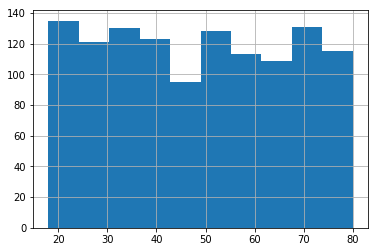

In [41]:
age.hist()

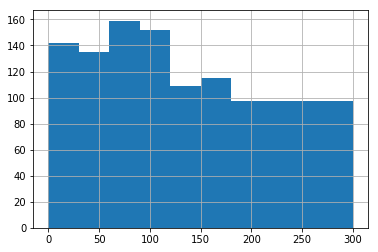

In [42]:
exercise_time.hist()

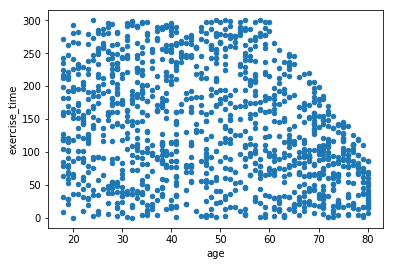

In [44]:
df.plot.scatter('age','exercise_time')

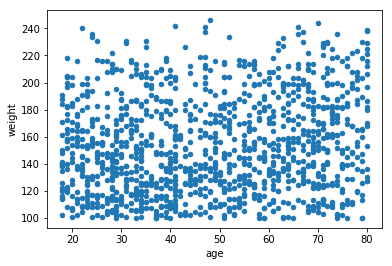

In [45]:
df.plot.scatter('age', 'weight')

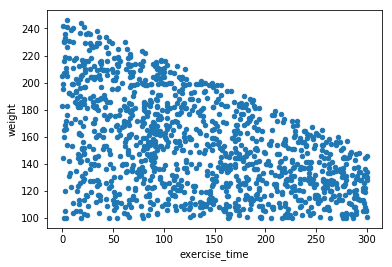

In [47]:
df.plot.scatter('exercise_time', 'weight')

It looks like people ages 20-55 exercise around an equal spread, and people on average exercise less past 55.

In [50]:
weight_cut = pd.cut(df['weight'],5)
age_cut = pd.cut(df['age'],5)
exercise_time_cut = pd.cut(df['exercise_time'],5)
# pd.crosstab(data_cut2 ,data_cut,normalize="all")
# pd.crosstab(data_cut2 ,data_cut,normalize="index")
crosstab_weight_age = pd.crosstab(age_cut,weight_cut,normalize="columns")
crosstab_weight_age

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
"(17.938, 30.4]",0.213333,0.256716,0.189922,0.189944,0.132075
"(30.4, 42.8]",0.277333,0.185075,0.189922,0.173184,0.132075
"(42.8, 55.2]",0.208000,0.185075,0.189922,0.145251,0.150943
"(55.2, 67.6]",0.141333,0.211940,0.174419,0.245810,0.169811
"(67.6, 80.0]",0.160000,0.161194,0.255814,0.245810,0.415094


Implication: The older you are, the more likely you're heavier.

In [52]:
crosstab_weight_exercise_time = pd.crosstab(exercise_time_cut, weight_cut, normalize="columns")
crosstab_weight_exercise_time

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 60.0]",0.141333,0.131343,0.236434,0.424581,0.830189
"(60.0, 120.0]",0.173333,0.226866,0.360465,0.407821,0.169811
"(120.0, 180.0]",0.189333,0.200000,0.217054,0.162011,0.000000
"(180.0, 240.0]",0.210667,0.220896,0.147287,0.005587,0.000000
"(240.0, 300.0]",0.285333,0.220896,0.038760,0.000000,0.000000


Implication: If you weigh more, you probably exercise less. If you weight less, you probably exercise more.

In [53]:
crosstab_age_exercise_time = pd.crosstab(exercise_time_cut, age_cut, normalize="columns")
crosstab_age_exercise_time

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]","(55.2, 67.6]","(67.6, 80.0]"
exercise_time,,,,,
"(-0.3, 60.0]",0.203125,0.205534,0.183857,0.207207,0.353659
"(60.0, 120.0]",0.179688,0.217391,0.188341,0.319820,0.414634
"(120.0, 180.0]",0.210938,0.166008,0.174888,0.180180,0.195122
"(180.0, 240.0]",0.238281,0.185771,0.152466,0.184685,0.036585
"(240.0, 300.0]",0.167969,0.225296,0.300448,0.108108,0.000000


Implication: There's no correlation in exercise and age until after 55 years old, where people start going towards less exercise.

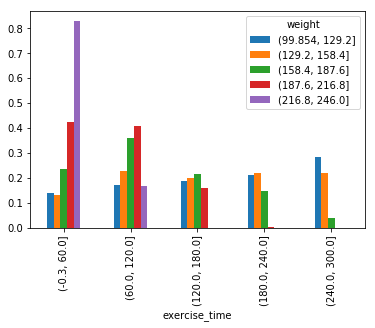

In [54]:
crosstab_weight_exercise_time.plot(kind='bar')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

All the variables are continous, including age since there's no defined maximum age.

2.  What are the relationships between the variables?

- Older people tend to exercise less.
- More exercise means less weight.
- Older people tend to be heavier.

3.  Which relationships are "real", and which spurious?

- It's true that older people exercise less, but that doesen't mean younger people exercise more.
- You tend to weigh less when exercising more, but that doesn't mean you're fat if you don't exercise.
- Older people may have a higher likelihood of weighing more, but is that really because of their age, or that fact they tend to exercise less?

Essentially, there's no linear relationship in this set.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)